In [1]:
import sys
sys.path.append('../..')

from nn import Model
from nn.layers import Dense, Dropout
from nn.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

np.set_printoptions(precision=3)
np.random.seed(1)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_train = X_train / 255
y_train = y_train

X_test = X_test.reshape((X_test.shape[0], -1))
X_test = X_test / 255

In [3]:
no_reg = Model()
no_reg.add(Dense(50, 'sigmoid', input_shape=(784,)))
no_reg.add(Dense(10, 'softmax'))
no_reg.compile(optimizer=Adam())
no_reg.fit(X_train, y_train, epochs=30, batch_size=32, validation_fraction=0.2)

In [4]:
_, train_scores = no_reg.evaluate(X_train, y_train)
_, test_scores = no_reg.evaluate(X_test, y_test)
print('Train/Test accuracy: %0.3f/%0.3f' % (train_scores['acc'], test_scores['acc']))

Train/Test accuracy: 0.981/0.957


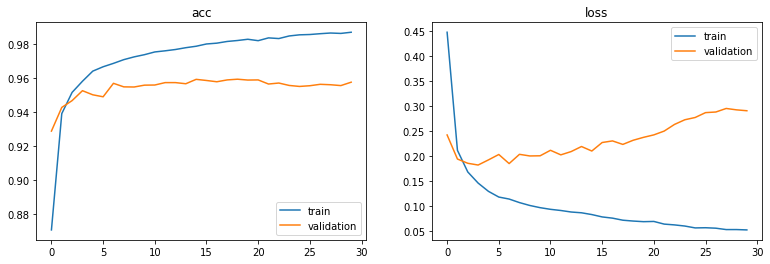

In [13]:
figure, subplots = plt.subplots(1, 2)
figure.set_size_inches(13, 4)

for subplot, metric in zip(subplots, ['acc', 'loss']):
    subplot.plot(no_reg.scores[metric])
    subplot.plot(no_reg.scores['val_' + metric])
    subplot.set_title(metric)
    subplot.legend(['train', 'validation'])

plt.show()

In [6]:
reg = Model()
reg.add(Dense(50, 'sigmoid', input_shape=(784,)))
reg.add(Dropout(keep_prob=0.5))
reg.add(Dense(10, 'softmax'))
reg.compile(optimizer=Adam())
reg.fit(X_train, y_train, epochs=30, batch_size=32, validation_fraction=0.2)

In [7]:
_, train_scores = reg.evaluate(X_train, y_train)
_, test_scores = reg.evaluate(X_test, y_test)
print('Train/Test accuracy: %0.3f/%0.3f' % (train_scores['acc'], test_scores['acc']))

Train/Test accuracy: 0.958/0.947


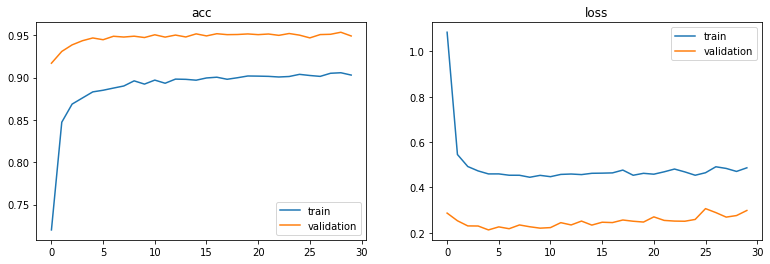

In [16]:
figure, subplots = plt.subplots(1, 2)
figure.set_size_inches(13, 4)

for subplot, metric in zip(subplots, ['acc', 'loss']):
    subplot.plot(reg.scores[metric])
    subplot.plot(reg.scores['val_' + metric])
    subplot.set_title(metric)
    subplot.legend(['train', 'validation'])

plt.show()